In [81]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

#Remove warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

In [113]:
data = pd.read_csv('cancer.csv')
df1 = pd.DataFrame(data)
df = df1.drop(['id', 'Unnamed: 32'],axis=1)
df.head()

#Diagnosis will be the target value here

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


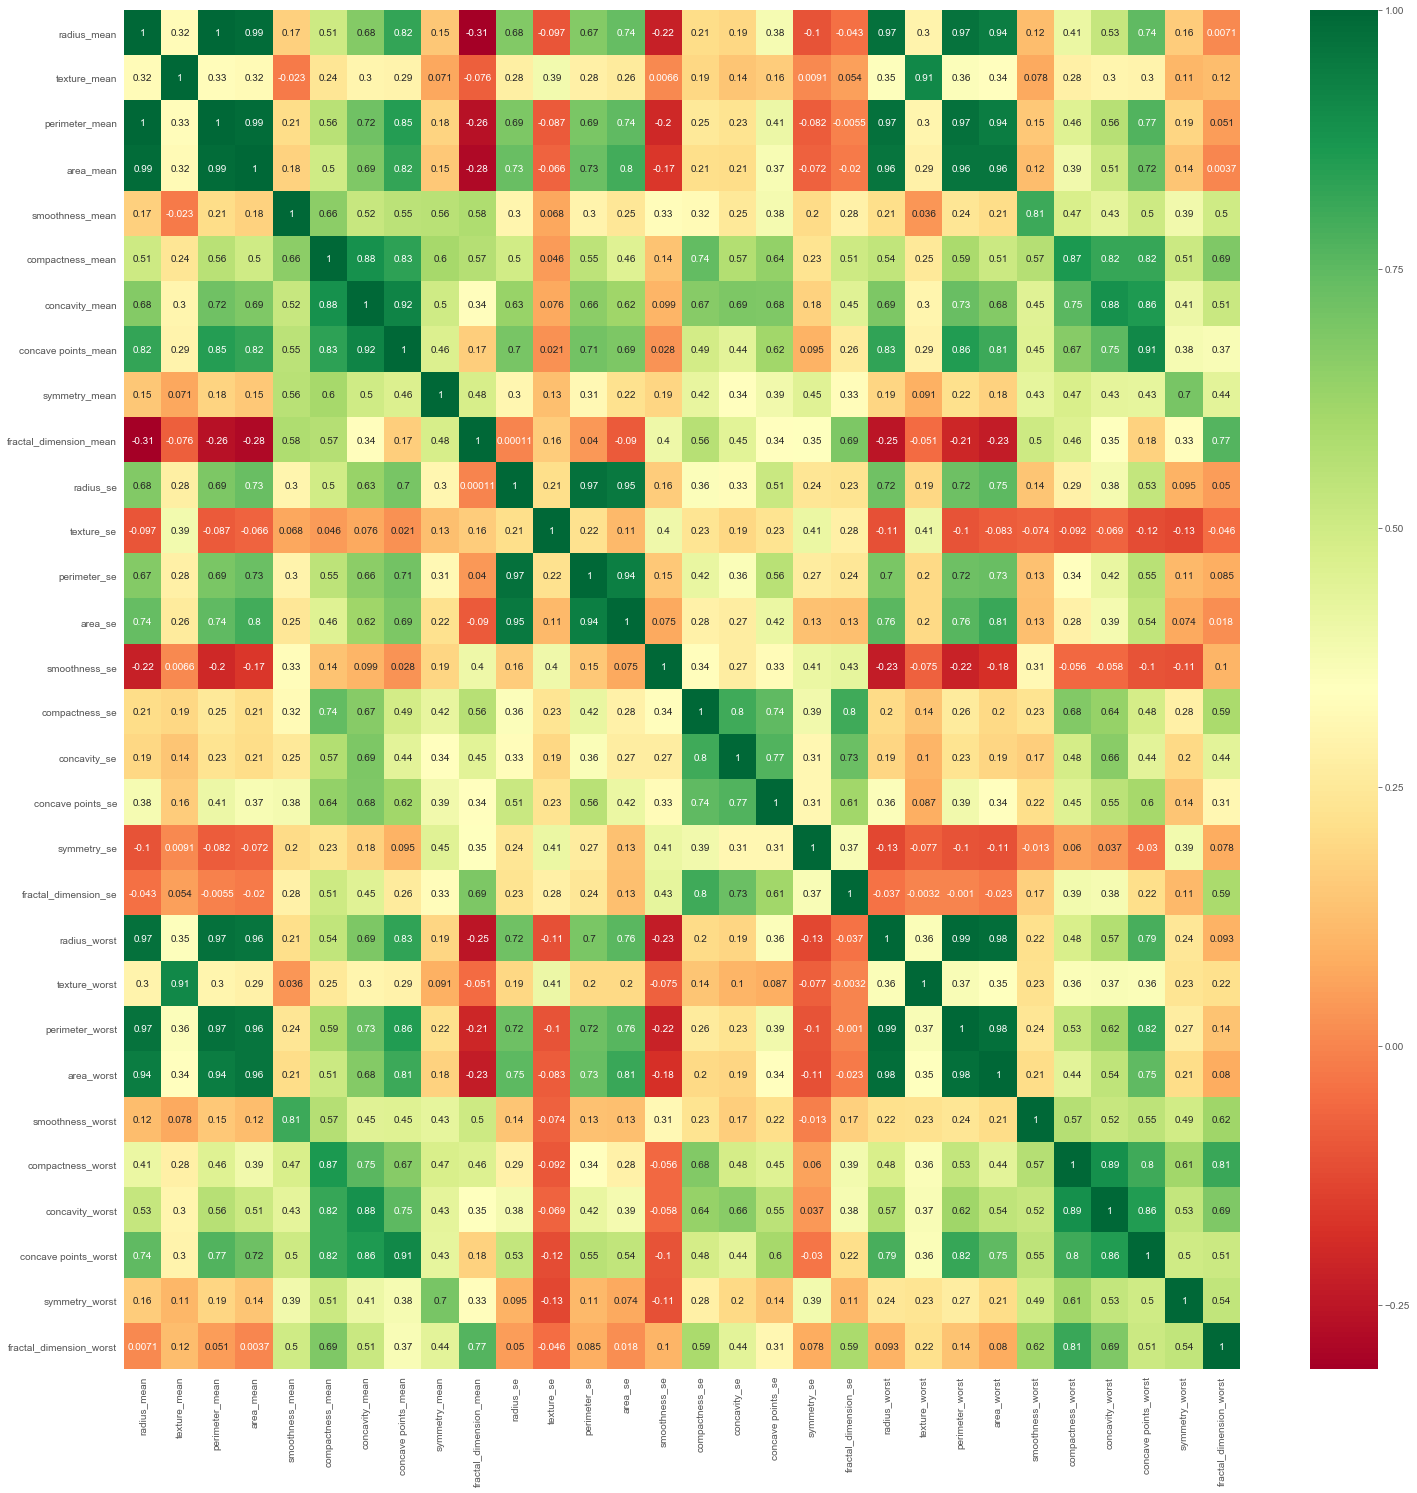

In [114]:
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [115]:
df.diagnosis[df.diagnosis == 'M'] = 1
df.diagnosis[df.diagnosis == 'B'] = 0
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### We have 212 malignant tumors and 357 benign
Malignanat represents 36% of our data.

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

x = df.drop(['diagnosis'], axis=1) #training features
y = df.diagnosis #target

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size = .1)

In [156]:
params = {'n_estimators': 700,
          'max_features': 'sqrt',
          'max_depth': 12}

# Initialize and fit the model.
clf = ensemble.ExtraTreesRegressor(**params)
clf.fit(x_train, y_train)

print('Training accuracy for ExtraTrees is: {}'.format(clf.score(x_train, y_train)))
print('Test accuracy for ExtraTrees is: {}'.format(clf.score(x_test, y_test)))

scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Cross Val ExtraTrees Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy for ExtraTrees is: 0.9973731387066512
Test accuracy for ExtraTrees is: 0.9349670275759187
Cross Val ExtraTrees Accuracy: 0.87 (+/- 0.07)


In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [600,700,800],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [7,8,9,10,11,12]
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(x_train, y_train)

CV_clf.best_params_

{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 700}